#  Heart Disease Prediction



In [103]:
import pandas as pd
import numpy as np

In [104]:
heart_data = pd.read_csv('heart.csv')

In [105]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [106]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [107]:
heart_data.shape

(303, 14)

In [108]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Columns Description:

1.   **age** (Age of the patient in years)
2.   **sex** (1 = Male/ 0 = Female)
3. **cp** chest pain type (0 = typical angina, 1 = atypical angina 2 = non-anginal 3 = asymptomatic)
4. **trestbps** resting blood pressure (resting blood pressure (in mm Hg on
admission to the hospital))
5. **chol** (serum cholesterol in mg/dl)
6. **fbs** (if fasting blood sugar > 120 mg/dl)
7. **restecg** (resting electrocardiographic results) -- Values: [0 = normal, 1 =
 stt abnormality, 2 = lv hypertrophy]
8. **thalach**: maximum heart rate achieved
9. **exang**: exercise-induced angina (True/ False)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: the slope of the peak exercise ST segment
12. **ca**: number of major vessels (0-3) colored by fluoroscopy
13. **thal**:[normal; fixed defect; reversible defect]
14. **num**: the predicted attribute

In [109]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


From mean, we can see that our heart dataset is mostly for old people (above 50). Then youngest person in our dataset is 29 years old.

In [110]:
missing_values = heart_data.isnull()

In [111]:
missing_counts = heart_data.isnull().sum()
missing_counts

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

So , it means that our data has no missing values

In [112]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


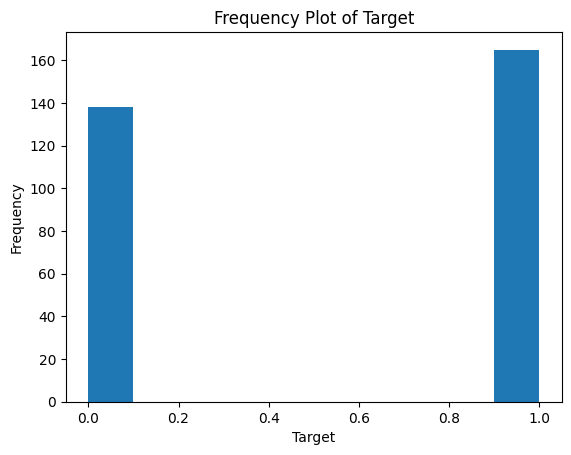

In [113]:
import matplotlib.pyplot as plt
target = heart_data["target"]
plt.hist(target)
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.title("Frequency Plot of Target")

plt.show()

From the dataset , we can see that our data is equal, half for people with no cardivascular disorder, and other for people with cardiovacular disorder

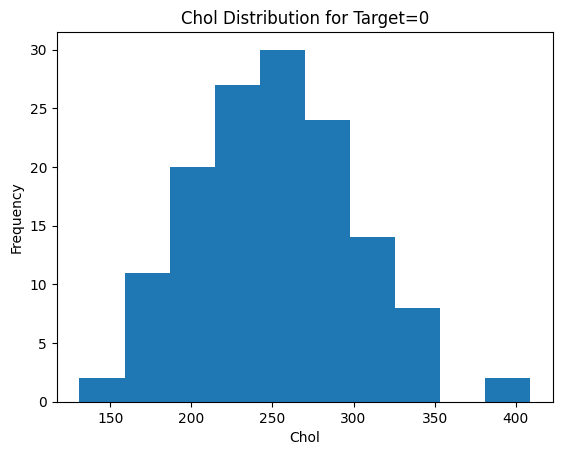

In [114]:
target_0_data = heart_data[heart_data['target'] == 0]
plt.hist(target_0_data['chol'])
plt.xlabel('Chol')
plt.ylabel('Frequency')
plt.title('Chol Distribution for Target=0')
plt.show()

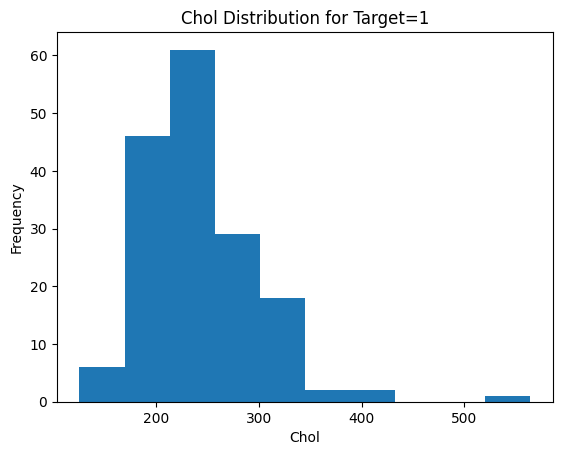

In [115]:
target_1_data = heart_data[heart_data['target'] == 1]
plt.hist(target_1_data['chol'])
plt.xlabel('Chol')
plt.ylabel('Frequency')
plt.title('Chol Distribution for Target=1')
plt.show()

From the graph of cholestrol, we can see that its values are almost equal in both cases, we are not getting much information from cholestrol alone

<Axes: xlabel='cp', ylabel='count'>

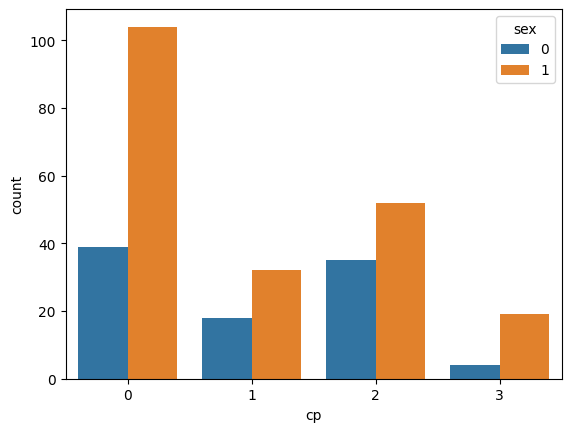

In [116]:
import seaborn as sns
sns.countplot(heart_data, x='cp', hue= 'sex')

<Axes: xlabel='age', ylabel='Count'>

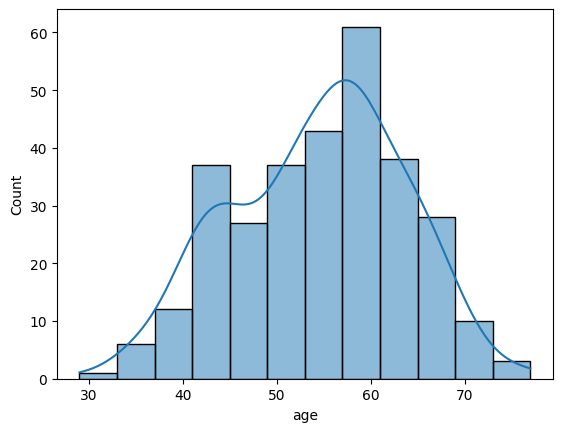

In [117]:


sns.histplot(heart_data['age'], kde=True)

The age column distribution seems to be normaly distributed because we can clearly see the bill curve

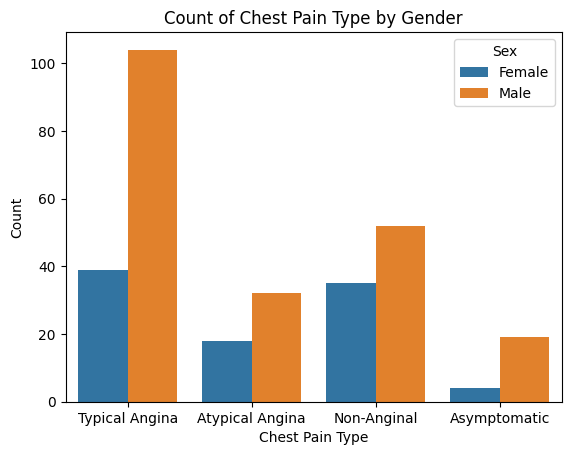

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

sex_labels = {0: 'Female', 1: 'Male'}
cp_labels = {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal', 3: 'Asymptomatic'}

sns.countplot(data=heart_data, x='cp', hue='sex')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Count of Chest Pain Type by Gender')
plt.legend(title='Sex', labels=[sex_labels[0], sex_labels[1]])
plt.xticks(ticks=range(0, 4), labels=[cp_labels[i] for i in range(0, 4)])
plt.show()

Mostly males have typical angina while female have equal ratio of of typical and non anginal pain. We can also infer fro this, that from our dataset, mostly males have the problem of heart diseases.

[]

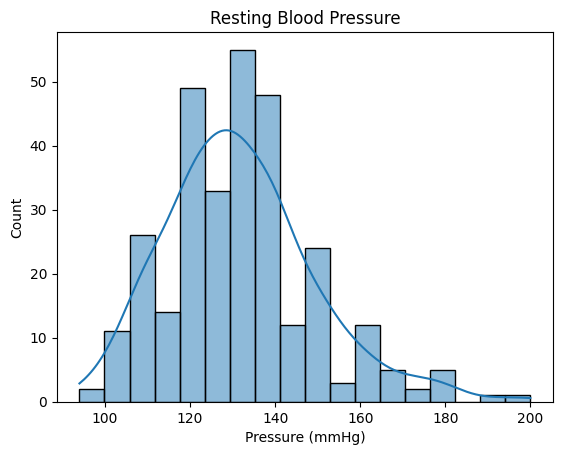

In [119]:
sns.histplot(data=heart_data,
             x='trestbps',
             kde=True)
plt.title('Resting Blood Pressure')
plt.xlabel('Pressure (mmHg)')
plt.ylabel('Count')
plt.plot()

People had high blood pressure when they were first admitted to the hospital, mostly peaked at at 140. Some had normal too.

Now that we have done data exploration and cleaning, Lets move towards data cleaning phase.
I will be using following models for trainig.
1. Logistic regression.
2. KNN
3. Naive Bayes
4. Support Vector Machine

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

In [121]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [122]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [123]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [136]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_parameters = {
    'Logistic Regression': {'C': 0.01},
    'KNN': {'n_neighbors': 5},
    'Naive Bayes': {},
}

def train_models(X, Y, model_params):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

    models = {
        "Logistic Regression": (LogisticRegression(), model_params.get('Logistic Regression', {})),
        "KNN": (KNeighborsClassifier(), model_params.get('KNN', {})),
        "Naive Bayes": (GaussianNB(), model_params.get('Naive Bayes', {})),
        "SVM": (SVC(), model_parameters.get('SVM', {'kernel': 'linear', 'C': 1.0, 'gamma': 'scale'}))
    }

    results = []

    for name, (model, params) in models.items():
        model.set_params(**params)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)
        confusion = confusion_matrix(Y_test, Y_pred)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "Confusion Matrix": confusion,
            "Precision": report['weighted avg']['precision'],
            "Recall": report['weighted avg']['recall'],
            "F1-score": report['weighted avg']['f1-score']
        })


    results_df = pd.DataFrame(results)
    return results_df

results_df = train_models(X, Y, model_parameters)
results_df


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Confusion Matrix,Precision,Recall,F1-score
0,Logistic Regression,0.770492,"[[17, 8], [6, 30]]",0.768841,0.770492,0.768812
1,KNN,0.672131,"[[15, 10], [10, 26]]",0.672131,0.672131,0.672131
2,Naive Bayes,0.786885,"[[18, 7], [6, 30]]",0.785888,0.786885,0.786170
3,SVM,0.868852,"[[20, 5], [3, 33]]",0.868890,0.868852,0.867892


In [137]:
svc_params = {'kernel': 'linear', 'C': 1.0, 'gamma': 'scale'}
support_vector = SVC(**svc_params)
support_vector.fit(X_train, Y_train)

SVC(kernel='linear')

Building a Predictive System

In [138]:
#Taking an example of non-heart disease patient

input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

input_data= np.asarray(input_data)

input_data = input_data.reshape(1,-1)

prediction = support_vector.predict(input_data)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Saving the Model

In [139]:
import pickle

In [140]:
filename = 'heart_model.sav'
pickle.dump(support_vector, open(filename,'wb'))

In [141]:
loaded_model = pickle.load(open('heart_model.sav','rb'))

In [142]:
#Taking an example of non-heart disease patient

input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

input_data= np.asarray(input_data)

input_data = input_data.reshape(1,-1)

prediction = loaded_model.predict(input_data)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [143]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
